TITANIC SURVIVAL PREDICTION

Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not.

Importing necessary libraries

In [ ]:
import pandas as pd

Loading the dataset

In [ ]:
data = pd.read_csv('/content/Titanic-Dataset.csv')

Viewing the dataset

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


To know about the rows and columns of the dataset

In [ ]:
data.shape

(891, 12)

# Data Cleaning

To know about the if there are null values or not

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handle Missing values



In [ ]:
 # Too many missing values, drop 'Cabin'
titanic_data_cleaned = data.drop(columns=['Cabin'])

In [ ]:
# Fill missing 'Embarked' with the most common value
most_frequent_embarked = titanic_data_cleaned['Embarked'].mode()[0]
titanic_data_cleaned['Embarked'] = titanic_data_cleaned['Embarked'].fillna(most_frequent_embarked)

In [ ]:
# Fill missing 'Age' with median
median_age = titanic_data_cleaned['Age'].dropna().median()
titanic_data_cleaned['Age'] = titanic_data_cleaned['Age'].fillna(median_age)

In [ ]:
titanic_data_cleaned.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Data Visualization

Visualize the number of survivors and death counts

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

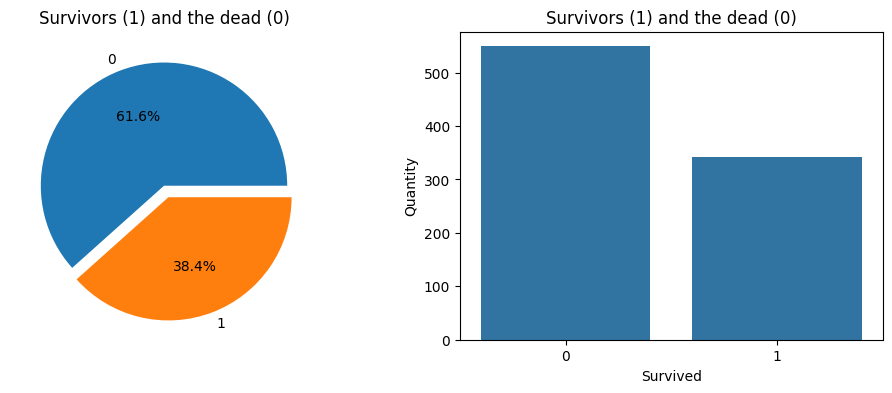

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
data['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors (1) and the dead (0)')
plt.show()

Impact of Sex on Survival Rates

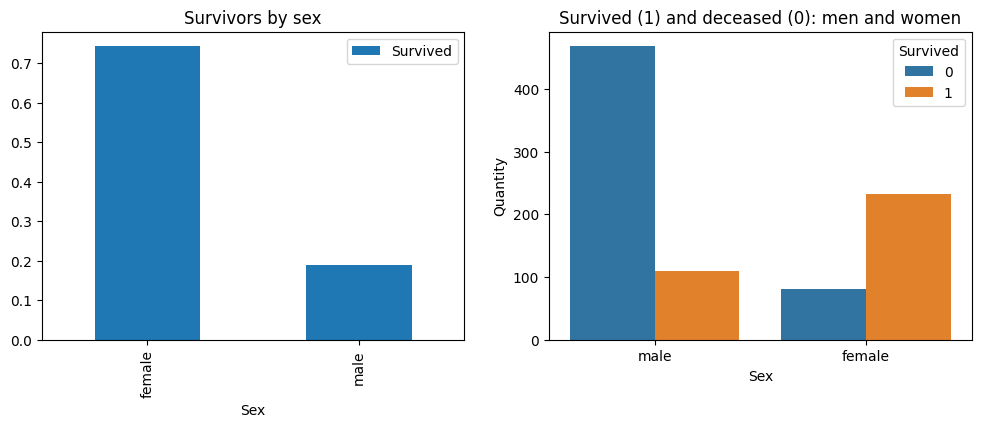

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by sex')
sns.countplot(x='Sex', hue='Survived', data= data, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and deceased (0): men and women')
plt.show()

# Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [ ]:
# Convert 'Sex' column into numerical using Label Encoding
label_encoder = LabelEncoder()
titanic_data_cleaned['Sex'] = label_encoder.fit_transform(titanic_data_cleaned['Sex'])

In [ ]:
# Convert 'Embarked' column using one-hot encoding
titanic_data_cleaned = pd.get_dummies(titanic_data_cleaned, columns=['Embarked'], drop_first=True)

Correlation matrix to choose relevant features

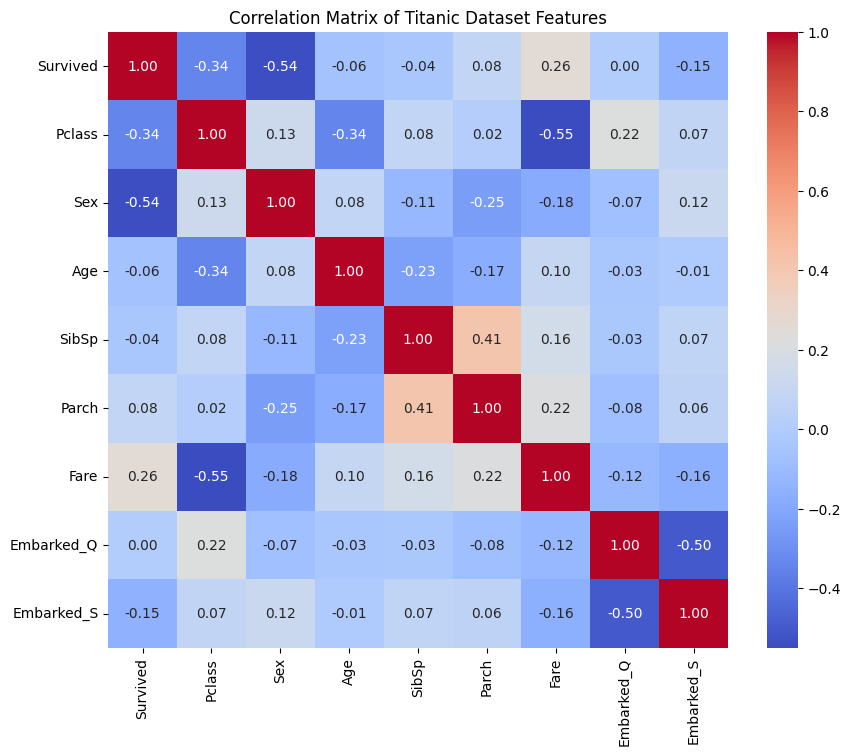

In [ ]:
# Drop non-numeric columns before calculating the correlation matrix
numeric_data = titanic_data_cleaned.drop(columns=['Name', 'Ticket', 'PassengerId'])  # Remove 'Name', 'Ticket' and 'PassengerId' columns

# Now calculate the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()  # Use the modified DataFrame
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Titanic Dataset Features')
plt.show()

In [ ]:
# Select relevant features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

In [ ]:
X = titanic_data_cleaned[features]
y = titanic_data_cleaned[target]

Split the dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

Scale the numerical features

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train and Evaluate Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.8100558659217877


In [ ]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.8100558659217877


In [ ]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
print("\nDecision Tree Results:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Accuracy: 0.7877094972067039


Compare Model Performance

<ipython-input-76-b5a8c194c87c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


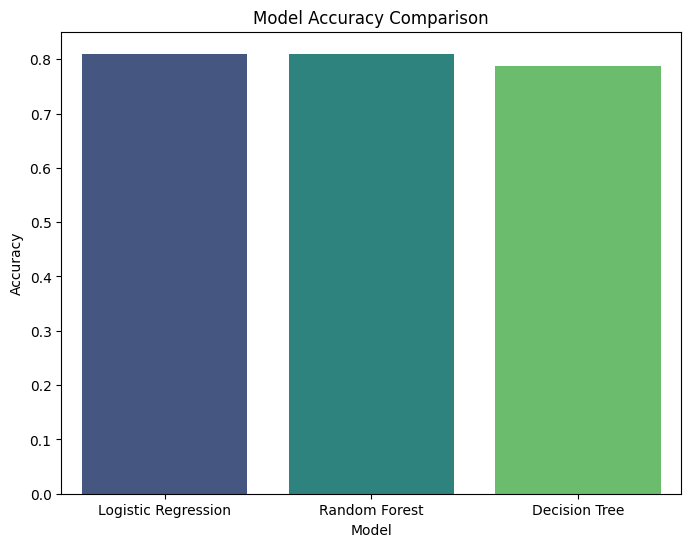

In [ ]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [accuracy_score(y_test, y_pred_log),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_dt)]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
ids = test['PassengerId']

predictions = rf_clf.predict(test[features])

# set the output as a dataframe and convert
# to csv file named resultfile.csv
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
output.to_csv('resultfile.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
df = pd.read_csv("/content/resultfile.csv")

In [ ]:
df.head()

,PassengerId,Survived
0,710,0
1,440,0
2,841,0
3,721,0
4,40,0
